# Introduction to Python

## If you've attended LETS Camp Light's Introduction to Python workshop, you'll have already learned a little about what Python and programming are. This notebook will build upon that foundation by explaining the following topics:

+ Differences between web scraping and data scraping
+ Using libraries to acquire data
+ Using libraries to structure collected data
+ Using dataframes to view data
+ Using dataframes to analyze data

### 1. The basics

#### a. Web Scraping...
    #### ... specifically refers to extracting data from websites
    #### ... usually involves downloading and parsing HTML, sometimes automating browsers
    #### ... usually requires using tools like Beautiful Soup, Selenium, Srapy, etc.
    #### ... used commonly for collecting information like prices, reviews, news, or public data from web pages
    

#### b. Data Scraping...
    #### ... a broader term that refers to extracting data from ANY source, not just websites
    #### ... can involve scarping data from PDFs, Excel files, APIs, local files, images, databses, etc.
    #### ... usually requires tools based on the source of the data
    #### ... PANDAS for spreadsheets, PyPDF2 for PDFs, API client libraries, etc.
    #### ... used commonly for collecting data from various digital sources (not just websites)

#### In Intro to Python, you learned how to Assign Variables, Learned about Data Types, and Working with Variables

### 2. Let's start with Libraries

#### A library in Python is a reusable bundle of code, usually installed as a package. It can include modules (separate Python files with functions, classes, etc.) for a particular purpose.

#### Libraries simplify programming by providing tools for tasks like:

    #### Math and statistics (math, statistics)
    #### Data handling (pandas, numpy)
    #### Plotting (matplotlib, seaborn)
    #### Web scraping (requests, BeautifulSoup)
    #### Machine learning (scikit-learn, tensorflow)
    #### Automation, file handling, APIs, and much more


#### You import a library before you use it. Let's import BeautifulSoup.

In [54]:
!pip install beautifulsoup4 requests

#### You are installing the library itself (beautifulsoup4) and the command to fetch web pages (requests)

In [3]:
from bs4 import BeautifulSoup
import requests
import os

#### Find the webpage where the dataset resides (we will be using data.gov for this activity)

In [4]:
url = "https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6"
response = requests.get(url)
html = response.text

In [5]:
soup = BeautifulSoup(html, "html.parser")

In [6]:
paragraphs = soup.find_all('p')
for para in paragraphs:
    print(para.text)


                        An official website of the United States government
                    

                        Here’s how you know
                    

Official websites use .govA
                            .gov website belongs to an official government
                            organization in the United States.
                        

Secure .gov websites use HTTPSA
                            lock (
                            
Lock
A locked padlock

 ) or https:// means you’ve safely connected to
                            the .gov website. Share sensitive information only on official,
                            secure websites.
                        

          Our mission is to protect human health and the environment. 
        

read more


U.S. EPA Office of Research and Development (ORD)


Wesley Ingwersen


          Our mission is to protect human health and the environment. 
        

read more

The datasets comprise greenhouse gas (GHG) emission facto

#### BUT this will only get us all of the text on the website, but not the datasets!

#### How do we change the code to ensure we're scraping the datasets on the website? LETS take a look at the website:

In [7]:
url = "https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
# This gets all <a> tags under the Data section that have href (likely dataset links).
download_links = []

for a in soup.find_all('a', href=True):
    href = a['href']
    # Select likely downloadable files
    if href.endswith(('.csv', '.zip', '.xlsx', '.xls', '.txt')):
        # Convert relative to absolute if needed
        if href.startswith('/'):
            href = "https://catalog.data.gov" + href
        download_links.append(href)

print("Found download links:")
for link in download_links:
    print(link)

Found download links:
https://pasteur.epa.gov/uploads/10.23719/1531143/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv
https://pasteur.epa.gov/uploads/10.23719/1531143/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_byGHG_USD2022.csv
https://pasteur.epa.gov/uploads/10.23719/1531143/documents/RelativeChangefromv1.2tov1.3.0inSEFsinCO2e.csv
 https://pasteur.epa.gov/uploads/10.23719/1531143/documents/RelativeChangefromv1.2tov1.3.0inSEFsbyGHG.csv


In [9]:
# Create a directory for downloads
download_dir = "supply_chain_datasets"
os.makedirs(download_dir, exist_ok=True)

for link in download_links:
    print(f"Downloading {link} ...")
    file_name = os.path.join(download_dir, link.split('/')[-1])
    # Some links might require the referer header to access (rare for data.gov, but good practice)
    response = requests.get(link, stream=True)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Saved: {file_name}")
    else:
        print(f"Failed to download {link}")

Saved: supply_chain_datasets\SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv
Saved: supply_chain_datasets\SupplyChainGHGEmissionFactors_v1.3.0_NAICS_byGHG_USD2022.csv
Saved: supply_chain_datasets\RelativeChangefromv1.2tov1.3.0inSEFsinCO2e.csv
Saved: supply_chain_datasets\RelativeChangefromv1.2tov1.3.0inSEFsbyGHG.csv


#### So now we have a nice folder that includes the datasets. But what do you do with them now? How do you do any analysis?

### 3. We will now use another library called Pandas to analyze the tabular data!

In [10]:
!pip install pandas

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('supply_chain_datasets/RelativeChangefromv1.2tov1.3.0inSEFsbyGHG.csv')

#### Using a Pandas dataframe, show the first five rows:

In [13]:
df.head()

,2017 NAICS Code,2017 NAICS Title,v1.2,v1.3.0,Relative Change,Type,GHG
0,111110,Soybean Farming,0.495,0.172,-0.652525,Supply Chain Emission Factors with Margins,Carbon dioxide
1,111120,Oilseed (except Soybean) Farming,0.495,0.172,-0.652525,Supply Chain Emission Factors with Margins,Carbon dioxide
2,111130,Dry Pea and Bean Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide
3,111140,Wheat Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide
4,111150,Corn Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide


#### Show the rows, columns (the shape of the data)

In [14]:
df.shape

(3048, 7)

#### List all columns:

In [15]:
df.columns

Index(['2017 NAICS Code', '2017 NAICS Title', 'v1.2', 'v1.3.0',
       'Relative Change', 'Type', 'GHG'],
      dtype='object')

#### Describe the data in a basic summary:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   2017 NAICS Code   3048 non-null   int64  
 1   2017 NAICS Title  3048 non-null   object 
 2   v1.2              3048 non-null   float64
 3   v1.3.0            3048 non-null   float64
 4   Relative Change   3048 non-null   float64
 5   Type              3048 non-null   object 
 6   GHG               3048 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 166.8+ KB


In [17]:
df.describe()

,2017 NAICS Code,v1.2,v1.3.0,Relative Change
count,3048.000000,3048.000000,3048.000000,3048.000000
mean,424917.376969,0.088318,0.065576,-0.099730
std,164887.971983,0.202367,0.152045,1.568852
min,111110.000000,0.000001,0.000003,-0.941109
25%,325588.250000,0.000050,0.000046,-0.337145
50%,423700.000000,0.000767,0.000529,-0.201321
75%,532111.250000,0.106000,0.089900,-0.039604
max,813990.000000,3.780000,3.860000,49.495050


#### List the first 50 results from the CSV:

In [18]:
df[:50]

,2017 NAICS Code,2017 NAICS Title,v1.2,v1.3.0,Relative Change,Type,GHG
0,111110,Soybean Farming,0.495,0.172,-0.652525,Supply Chain Emission Factors with Margins,Carbon dioxide
1,111120,Oilseed (except Soybean) Farming,0.495,0.172,-0.652525,Supply Chain Emission Factors with Margins,Carbon dioxide
2,111130,Dry Pea and Bean Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide
3,111140,Wheat Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide
4,111150,Corn Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide
5,111160,Rice Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide
6,111191,Oilseed and Grain Combination Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide
7,111199,All Other Grain Farming,1.060,0.207,-0.804717,Supply Chain Emission Factors with Margins,Carbon dioxide
8,111211,Potato Farming,0.243,0.194,-0.201646,Supply Chain Emission Factors with Margins,Carbon dioxide
9,111219,Other Vegetable (except Potato) and Melon Farming,0.243,0.194,-0.201646,Supply Chain Emission Factors with Margins,Carbon dioxide


#### Sample the data randomly:

In [19]:
df.sample(10)

,2017 NAICS Code,2017 NAICS Title,v1.2,v1.3.0,Relative Change,Type,GHG
1535,423920,Toy and Hobby Goods and Supplies Merchant Whol...,0.000511,0.000330,-0.354207,Supply Chain Emission Factors with Margins,Methane
2098,212111,Bituminous Coal and Lignite Surface Mining,0.000071,0.000031,-0.565771,Supply Chain Emission Factors with Margins,Nitrous oxide
1940,624229,Other Community Housing Services,0.001630,0.001660,0.018405,Supply Chain Emission Factors with Margins,Methane
1499,339994,"Broom, Brush, and Mop Manufacturing",0.000646,0.000433,-0.329721,Supply Chain Emission Factors with Margins,Methane
493,423320,"Brick, Stone, and Related Construction Materia...",0.126000,0.091700,-0.272222,Supply Chain Emission Factors with Margins,Carbon dioxide
2979,713910,Golf Courses and Country Clubs,0.000158,0.000116,-0.265823,Supply Chain Emission Factors with Margins,Nitrous oxide
1753,524114,Direct Health and Medical Insurance Carriers,0.000149,0.000157,0.053691,Supply Chain Emission Factors with Margins,Methane
128,311119,Other Animal Food Manufacturing,0.393000,0.192000,-0.511450,Supply Chain Emission Factors with Margins,Carbon dioxide
1043,111991,Sugar Beet Farming,0.001920,0.000818,-0.573958,Supply Chain Emission Factors with Margins,Methane
2732,515210,Cable and Other Subscription Programming,0.000009,0.000008,-0.126682,Supply Chain Emission Factors with Margins,Nitrous oxide


#### Find missing data:

In [20]:
# Count missing values in each column
print(df.isnull().sum())

# % missing values in each column
print((df.isnull().sum() / len(df)) * 100)

2017 NAICS Code     0
2017 NAICS Title    0
v1.2                0
v1.3.0              0
Relative Change     0
Type                0
GHG                 0
dtype: int64
2017 NAICS Code     0.0
2017 NAICS Title    0.0
v1.2                0.0
v1.3.0              0.0
Relative Change     0.0
Type                0.0
GHG                 0.0
dtype: float64


In [21]:
# Count most frequent emissions
print(df['GHG'].value_counts())

GHG
Carbon dioxide    1016
Methane           1016
Nitrous oxide     1016
Name: count, dtype: int64


In [22]:
print(df['2017 NAICS Title'].value_counts())

2017 NAICS Title
Soybean Farming                                                                                    3
Book Publishers                                                                                    3
Other Support Activities for Road Transportation                                                   3
Freight Transportation Arrangement                                                                 3
Packing and Crating                                                                                3
                                                                                                  ..
Other Metal Valve and Pipe Fitting Manufacturing                                                   3
Ball and Roller Bearing Manufacturing                                                              3
Small Arms Ammunition Manufacturing                                                                3
Ammunition (except Small Arms) Manufacturing                              

In [23]:
top_naics = df[['2017 NAICS Code', 'GHG']].sort_values('GHG', ascending=False).head(10)
print(top_naics)

      2017 NAICS Code            GHG
3047           813990  Nitrous oxide
2365           332618  Nitrous oxide
2378           332993  Nitrous oxide
2377           332992  Nitrous oxide
2376           332991  Nitrous oxide
2375           332919  Nitrous oxide
2374           332913  Nitrous oxide
2373           332912  Nitrous oxide
2372           332911  Nitrous oxide
2371           332813  Nitrous oxide


In [24]:
# Make sure column names are stripped of extra quotes/spaces if needed
df['GHG'] = df['GHG'].str.replace('"', '').str.strip()
df['2017 NAICS Title'] = df['2017 NAICS Title'].str.replace('"', '').str.strip()

In [25]:
# Filter for "Methane" in GHG and "Farming" in title
filter_condition = (df['GHG'].str.lower() == 'methane') & (df['2017 NAICS Title'].str.contains('farming', case=False))

In [26]:
# Total count
total_count = filter_condition.sum()
print("Total count of rows with Methane and Farming:", total_count)

Total count of rows with Methane and Farming: 29


In [27]:
filtered_df = df[filter_condition]

In [28]:
filtered_df.head()  # View the first few matching rows

,2017 NAICS Code,2017 NAICS Title,v1.2,v1.3.0,Relative Change,Type,GHG
1016,111110,Soybean Farming,0.00157,0.000482,-0.692994,Supply Chain Emission Factors with Margins,Methane
1017,111120,Oilseed (except Soybean) Farming,0.00157,0.000482,-0.692994,Supply Chain Emission Factors with Margins,Methane
1018,111130,Dry Pea and Bean Farming,0.00976,0.003980,-0.592213,Supply Chain Emission Factors with Margins,Methane
1019,111140,Wheat Farming,0.00976,0.003980,-0.592213,Supply Chain Emission Factors with Margins,Methane
1020,111150,Corn Farming,0.00976,0.003980,-0.592213,Supply Chain Emission Factors with Margins,Methane


### 4. There are so many other things we can do here, including using data visualization libraries in Python to make beautiful plots!

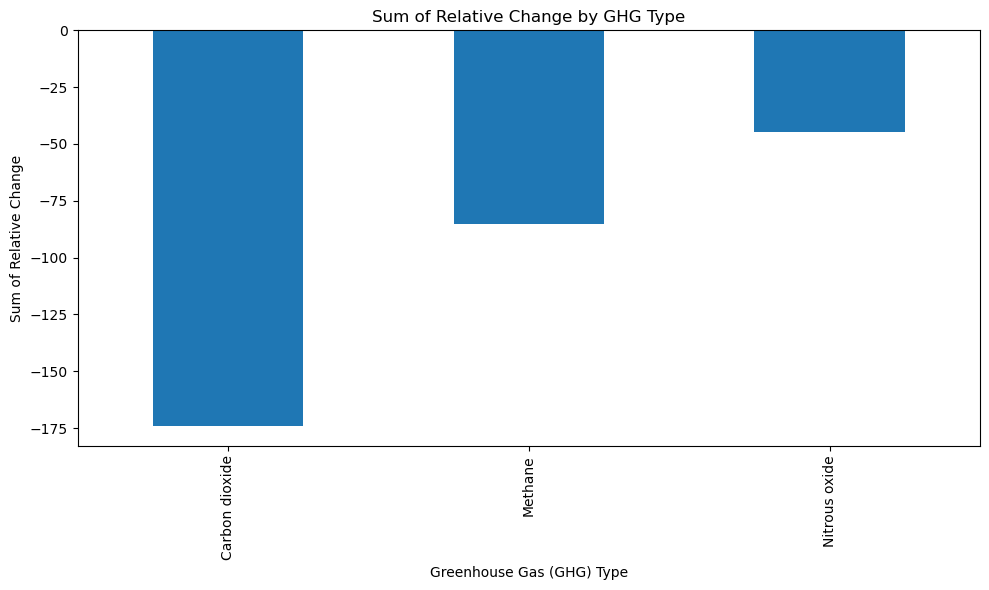

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Clean if necessary
df['GHG'] = df['GHG'].str.replace('"', '').str.strip()
df['Relative Change'] = pd.to_numeric(df['Relative Change'], errors='coerce')

# Group and sum relative change
ghg_change = df.groupby('GHG')['Relative Change'].sum().sort_values()

plt.figure(figsize=(10,6))
ghg_change.plot(kind='bar', color='tab:blue')
plt.xlabel('Greenhouse Gas (GHG) Type')
plt.ylabel('Sum of Relative Change')
plt.title('Sum of Relative Change by GHG Type')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

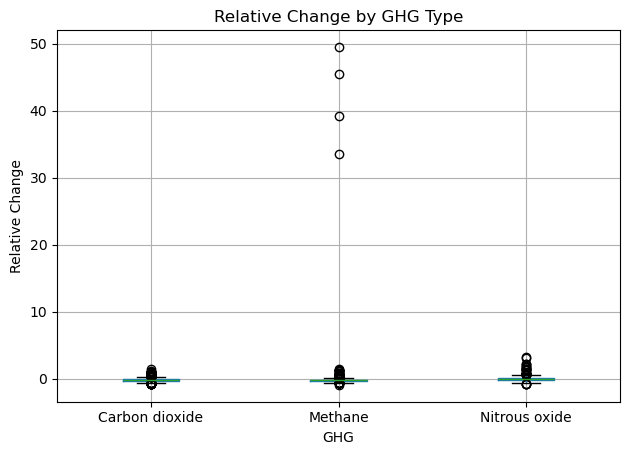

In [33]:
plt.figure(figsize=(8,6))
df.boxplot(column='Relative Change', by='GHG')
plt.ylabel('Relative Change')
plt.title('Relative Change by GHG Type')
plt.suptitle('')
plt.tight_layout()
plt.show()

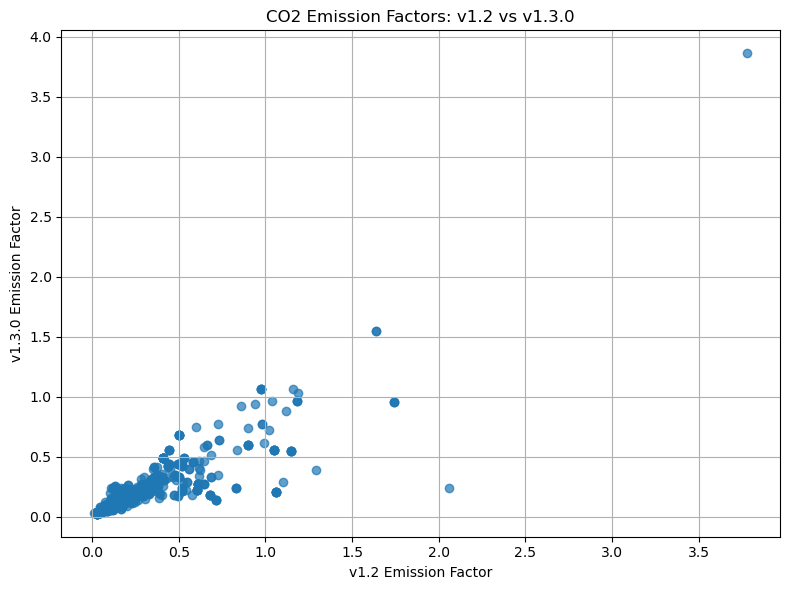

In [34]:
# Clean columns and filter for CO2
df['v1.2'] = pd.to_numeric(df['v1.2'], errors='coerce')
df['v1.3.0'] = pd.to_numeric(df['v1.3.0'], errors='coerce')
co2_df = df[df['GHG'] == 'Carbon dioxide']

plt.figure(figsize=(8,6))
plt.scatter(co2_df['v1.2'], co2_df['v1.3.0'], alpha=0.7)
plt.xlabel('v1.2 Emission Factor')
plt.ylabel('v1.3.0 Emission Factor')
plt.title('CO2 Emission Factors: v1.2 vs v1.3.0')
plt.grid(True)
plt.tight_layout()
plt.show()